In [1]:
import time
import requests
import hashlib
import hmac
import base64

import webbrowser
from urllib.parse import quote
import pandas as pd

import matplotlib.pyplot as plt


## Login

In [2]:
import datetime
def k(time):
    # Converti il timestamp Unix in secondi dividendo per 1000 per ottenere i secondi
    timestamp_in_secondi = time
    # 1709162640000, None, None, 2.0],
    #  [1709162820000
    print(int(timestamp_in_secondi/60/60), (timestamp_in_secondi/60)%60)
    # Converti il timestamp in un oggetto datetime
    data = datetime.datetime.fromtimestamp(timestamp_in_secondi)

    # Estrai giorno, ora e minuti
    giorno = data.strftime("%Y-%m-%d")
    ora = data.strftime("%H:%M:%S")

    print("Giorno:", giorno)
    print("Ora:", ora)


In [3]:
def today():
    today = datetime.date.today()
    print(today)
    # start mezzanote unix
    start = datetime.datetime(today.year, today.month, today.day, 0, 0, 0)
    start = int(start.timestamp())
    # end mezzanote unix
    end = datetime.datetime(today.year, today.month, today.day, 23, 59, 59)
    end = int(end.timestamp())

    # end == now
    end = int(datetime.datetime.now().timestamp())+60*60*2
    print(end)
    
    return start, end


In [4]:
start, end = today()
k(end)

2024-04-17
1713346197
475929 29.949999999254942
Giorno: 2024-04-17
Ora: 11:29:57


In [5]:
k(37260)

10 21.0
Giorno: 1970-01-01
Ora: 11:21:00


In [6]:
37260/60/60

10.35

# requests

In [7]:
def generate_oauth_nonce():
    # Nonce is a unique value, here we use a simple timestamp
    return str(int(time.time()))

def generate_oauth_timestamp():
    # Current timestamp in seconds
    return str(int(time.time()))

def generate_oauth_signature(base_url, method, params, consumer_secret, token_secret, consumer_key, access_token):
    # Collecting all parameters
    all_params = {
        **params,
        'oauth_consumer_key': consumer_key,
        'oauth_token': access_token,
        'oauth_signature_method': 'HMAC-SHA1',
        'oauth_timestamp': generate_oauth_timestamp(),
        'oauth_nonce': generate_oauth_nonce(),
        'oauth_version': '1.0'
    }
    
    # Sorting the parameters and encoding them
    encoded_params = '&'.join([f"{quote(k, safe='')}={quote(str(all_params[k]), safe='')}" for k in sorted(all_params)])

    # Constructing the base string
    base_string = '&'.join([method, quote(base_url, safe=''), quote(encoded_params, safe='')])

    # Constructing the signing key
    signing_key = f"{quote(consumer_secret, safe='')}&{quote(token_secret, safe='')}"
    
    # Generating the signature
    hashed = hmac.new(signing_key.encode(), base_string.encode(), hashlib.sha1)
    signature = base64.b64encode(hashed.digest()).decode()

    return signature

def make_api_request(start_time, end_time, index):
    base_url = f"https://apis.garmin.com/wellness-api/rest/{index}"
    params = {
        "uploadStartTimeInSeconds": start_time,
        "uploadEndTimeInSeconds": end_time
    }

    # Add your OAuth 1.0 authentication keys here
    consumer_key = "4abf826a-87c6-434c-a7f0-b65c14fcf3f4"
    consumer_secret = "BiLzHopVh8h30KlnspZpwVvlierOZXHzFKu"
    access_token = "3b76468e-b934-45de-a90a-673add971181"
    token_secret = "XogfActj8BmA1QVHh3laaklbFxwuXkO52mo"

    method = 'GET'  # or 'POST' if it's a POST request
    oauth_signature = generate_oauth_signature(base_url, method, params, consumer_secret, token_secret, consumer_key, access_token)

    headers = {
        "Authorization": f'OAuth oauth_consumer_key="{consumer_key}", '
                         f'oauth_token="{access_token}", '
                         f'oauth_signature_method="HMAC-SHA1", '
                         f'oauth_timestamp="{generate_oauth_timestamp()}", '
                         f'oauth_nonce="{generate_oauth_nonce()}", '
                         f'oauth_version="1.0", '
                         f'oauth_signature="{quote(oauth_signature, safe="")}"'
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)
        if response.status_code == 200:
            data = response.json()
            # Process the data as needed
            return data
        else:
            print(f"{index}: Error: {response.status_code} - {response.text}")
    except requests.RequestException as e:
        print(f"{index}: Error making API request: {e}")



In [8]:
metrics = ["userMetrics","stressDetails","respiration","pulseOx","moveiq","hrv","healthSnapshot","epochs","dailies","bodyComps","bloodPressures"]
# manuallyUpdatedActivities
# activityFile

In [9]:
start, end = today()
for index in metrics:
    print(index, ": api response: ", make_api_request(start, end, index))
    print("")

2024-04-17
1713346198
userMetrics : api response:  []

stressDetails : api response:  []

respiration : api response:  []

pulseOx : api response:  []

moveiq : api response:  []

hrv : api response:  []

healthSnapshot : api response:  []

epochs : api response:  []

dailies : api response:  []

bodyComps : api response:  []

bloodPressures : api response:  []



In [10]:
k(1709593200)

474887 0.0
Giorno: 2024-03-05
Ora: 00:00:00


In [11]:
start, end = today()
print(start, end)

2024-04-17
1713346206
1713304800 1713346206


In [12]:
print(list(make_api_request(start, end, "dailies")[-1]['timeOffsetHeartRateSamples'].values())[-1])
print(list(make_api_request(start, end, "pulseOx")[-1]['timeOffsetSpo2Values'].values())[-1])

IndexError: list index out of range

In [13]:
last_key = len(list(make_api_request(start, end, "dailies")[-1]['timeOffsetHeartRateSamples'].keys())[-15:])
print(last_key)

print(int(int(last_key)/60/60), int((int(last_key)/60)%60), int((int(last_key)/60/60)%60))

IndexError: list index out of range

In [ ]:
miobattito = pd.DataFrame()

start, end = today()
data = make_api_request(start, end, "dailies")[-1]["timeOffsetHeartRateSamples"]
last_key = list(data.keys())[-15:]
last_value = list(data.values())[-15:]
miobattito = pd.concat([miobattito, pd.DataFrame(last_value, index=last_key)])
print("Last key:", int(int(last_key[-1])/60/60), int((int(last_key[-1])/60)%60), int((int(last_key[-1])/60/60)%60), "last_value: ", last_value[-1])
print("")

2024-04-17
1713346147


IndexError: list index out of range

In [14]:
start, end = today()
miobattito = pd.DataFrame()
data = make_api_request(start, end, "dailies")[-1]["timeOffsetHeartRateSamples"]
last_key = list(data.keys())[-4:]
print(last_key)
last_value = list(data.values())[-4:]
for i in range(len(last_key)):
    print(last_key[i])
    ore = int(int(last_key[i])/60/60)
    minuti = int((int(last_key[i])/60)%60)
    secondi = int((int(last_key[i]))%60)
    print(ore, minuti, secondi)
    tod = [datetime.date.today()]
    y,m,g = tod[0].year, tod[0].month, tod[0].day
    last_key[i] =pd.to_datetime(datetime.datetime(y, m, g, ore, minuti, secondi))
    print(last_key[i])
miobattito = pd.concat([miobattito, pd.DataFrame(last_value, index=last_key)])
print("Last key:", last_key[-1], "last_value: ", last_value[-1])
print("")
print(miobattito)

2024-04-17
1713346215


IndexError: list index out of range

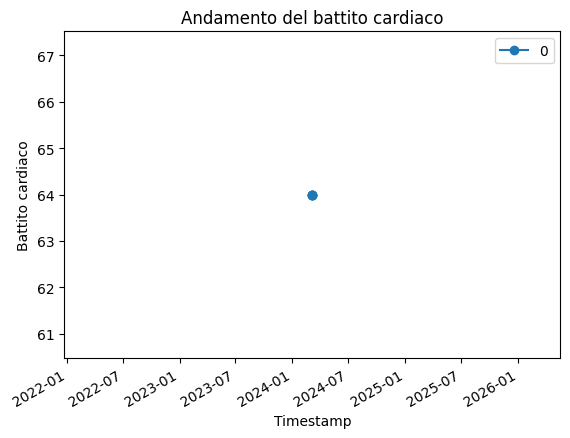

In [ ]:
# Plot dei dati
miobattito.plot(kind='line', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Battito cardiaco')
plt.title('Andamento del battito cardiaco')
plt.show()

In [15]:
miobattito = pd.DataFrame()
while True:
    try: 
        start, end = today()
        data = make_api_request(start, end, "dailies")[-1]["timeOffsetHeartRateSamples"]
        last_key = list(data.keys())[-15:]
        last_value = list(data.values())[-15:]
        miobattito = pd.concat([miobattito, pd.DataFrame(last_value, index=last_key)])
        print("Last key:", int(int(last_key[-1])/60/60), int((int(last_key[-1])/60)%60), int((int(last_key[-1])/60/60)%60), "last_value: ", last_value[-1])
        print("")
        time.sleep(15)
    except Exception as e:
        time.sleep(15)
        print(e)
        plt.plot(miobattito)

2024-04-17
1713346242
list index out of range
2024-04-17
1713346258
list index out of range
2024-04-17
1713346273
list index out of range
2024-04-17
1713346289
list index out of range
2024-04-17
1713346305
list index out of range
2024-04-17
1713346321
list index out of range
2024-04-17
1713346337
list index out of range
2024-04-17
1713346352
list index out of range
2024-04-17
1713346368
list index out of range
2024-04-17
1713346384
Last key: 9 32 9 last_value:  108

2024-04-17
1713346400
Last key: 9 33 9 last_value:  101

2024-04-17
1713346415
Last key: 9 33 9 last_value:  101

2024-04-17
1713346431
Last key: 9 33 9 last_value:  101

2024-04-17
1713346447
Last key: 9 33 9 last_value:  101

2024-04-17
1713346462
Last key: 9 34 9 last_value:  94

2024-04-17
1713346478
Last key: 9 34 9 last_value:  94

2024-04-17
1713346494
Last key: 9 34 9 last_value:  94

2024-04-17
1713346509
Last key: 9 34 9 last_value:  94

2024-04-17
1713346525
Last key: 9 34 9 last_value:  94

2024-04-17
1713346541

In [ ]:

data

[95, 95, 95, 95, 80, 80, 80, 80, 84, 84, 84, 84]

## Stress Score

In [ ]:
def calculate_hrv_stress_score(rr_intervals):
    """
    Calcola l'HRV Stress Score dato un elenco di intervalli RR (battiti cardiaci).

    Args:
        rr_intervals (list): Lista degli intervalli RR in millisecondi.

    Returns:
        float: HRV Stress Score.
    """
    num_intervals = len(rr_intervals)
    rr_avg = sum(rr_intervals) / num_intervals

    # Calcola la somma delle differenze quadrate tra ciascun intervallo RR e la media
    squared_diff_sum = sum((rr - rr_avg) ** 2 for rr in rr_intervals)

    # Calcola la deviazione standard della variabilità RR
    hrv_sdnn = (squared_diff_sum / (num_intervals - 1)) ** 0.5

    # Calcola l'HRV Stress Score normalizzato tra 0 e 100
    hrv_stress_score = (hrv_sdnn / rr_avg) * 100

    return hrv_stress_score

# Esempio di utilizzo
if __name__ == "__main__":
    # Esempio di lista di intervalli RR (in millisecondi)
    data= list(make_api_request(start, end, "dailies")[-1]["timeOffsetHeartRateSamples"].values())[-20:]
    print(list(make_api_request(start, end, "stressDetails")[-1][""]))

    # Calcola l'HRV Stress Score
    stress_score = calculate_hrv_stress_score(data)

    print(f"L'HRV Stress Score è: {stress_score:.2f}")


L'HRV Stress Score è: 6.65


In [14]:
print(list(make_api_request(start, end, "stressDetails")[-1]["timeOffsetStressLevelValues"].values())[-1])


IndexError: list index out of range

In [41]:
make_api_request(start, end, "stressDetails")[-1]

{'summaryId': 'x50f81bb-660f22e0-9aec',
 'startTimeInSeconds': 1712268000,
 'startTimeOffsetInSeconds': 7200,
 'durationInSeconds': 39660,
 'calendarDate': '2024-04-05',
 'timeOffsetStressLevelValues': {'0': -1,
  '180': -1,
  '360': -1,
  '540': -1,
  '720': -1,
  '900': -1,
  '1080': -1,
  '1260': -1,
  '1440': -1,
  '1620': -1,
  '1800': -1,
  '1980': -1,
  '2160': -1,
  '2340': -1,
  '2520': -1,
  '2700': -1,
  '2880': -1,
  '3060': -1,
  '3240': -1,
  '3420': -1,
  '3600': -1,
  '3780': -1,
  '3960': -1,
  '4140': -1,
  '4320': -1,
  '4500': -1,
  '4680': -1,
  '4860': -1,
  '5040': -1,
  '5220': -1,
  '5400': -1,
  '5580': -1,
  '5760': -1,
  '5940': -1,
  '6120': -1,
  '6300': -1,
  '6480': -1,
  '6660': -1,
  '6840': -1,
  '7020': -1,
  '7200': -1,
  '7380': -1,
  '7560': -1,
  '7740': -1,
  '7920': -1,
  '8100': -1,
  '8280': -1,
  '8460': -1,
  '8640': -1,
  '8820': -1,
  '9000': -1,
  '9180': -1,
  '9360': -1,
  '9540': -1,
  '9720': -1,
  '9900': -1,
  '10080': -1,
  '10260